<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/lab_07_2_Meet_Mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Reading data and set variables

In [5]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)
batch_xs,batch_ys = mnist.train.next_batch(100)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
nb_classes=10

#MNIST data image of shape 28*28 = 784
X = tf.placeholder(tf.float32,[None,784])
#0-9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32,[None,nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]))
b= tf.Variable(tf.random_normal([nb_classes]))

# Softmax!

In [0]:
# 크로스앤트로피 에러 함수
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*log(y+delta))

- delta를 더하는 이유는 log안의 숫자가 절대 0이 되지 않게 만들기 위해서이다. 즉, 마이너스 무한대가 발생하지 않게 하기 위해서임. [밑바닥 딥러닝 115pg]

In [0]:
# Hypothesis (using softmax)
hyphothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hyphothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Test model
is_correct = tf.equal(tf.arg_max(hyphothesis,1),tf.arg_max(Y,1)) #True, False로 나타냄.
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# Training epoch/batch

# Sameple image show and prediction

Epoch: 0001 cost =   2.711622
Epoch: 0002 cost =   1.107505
Epoch: 0003 cost =   0.896446
Epoch: 0004 cost =   0.789636
Epoch: 0005 cost =   0.721020
Epoch: 0006 cost =   0.670745
Epoch: 0007 cost =   0.632808
Epoch: 0008 cost =   0.602442
Epoch: 0009 cost =   0.578165
Epoch: 0010 cost =   0.556081
Epoch: 0011 cost =   0.537100
Epoch: 0012 cost =   0.521719
Epoch: 0013 cost =   0.507009
Epoch: 0014 cost =   0.494456
Epoch: 0015 cost =   0.483440
Accuracy: 0.8841
Label: [9]
Prediction: [9]


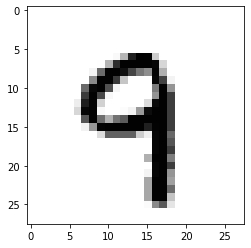

In [26]:
training_epochs =15
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #Training Cycle
  for epoch in range(training_epochs):
    avg_cost =0
    total_batch = int(mnist.train.num_examples/ batch_size)

    for i in range(total_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost,optimizer],
                      feed_dict={X:batch_xs,Y:batch_ys})
      avg_cost += c / total_batch
    
    print('Epoch:','%04d'%(epoch+1),
          'cost = ','{:9f}'.format(avg_cost))
  #Test the model using test sets
  print('Accuracy:',accuracy.eval(session=sess,
                                  feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
  
  ################### Sameple image show and prediction###################
  #Get one and predict
  r = random.randint(0,mnist.test.num_examples -1)
  print('Label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
  print('Prediction:',sess.run(tf.argmax(hyphothesis,1),
                             feed_dict={X:mnist.test.images[r:r+1]}))
  plt.imshow(mnist.test.images[r:r+1].
            reshape(28,28),cmap='Greys',interpolation='nearest')
  plt.show()